https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kurmukovai/ds-for-business/88ded3b36c5cc97c26756b4c62c98bbbf99deba3/2022/seminar-5/CC%20GENERAL.csv')
df.dropna(inplace=True)
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Credit Card dataset

- CUST_ID - Identification of Credit Card holder (Categorical)
- BALANCE - Balance amount left in their account to make purchases
- BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES - Amount of purchases made from account
- ONEOFF_PURCHASES - Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES - Amount of purchase done in installment
- CASH_ADVANCE - Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid
- CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX - Numbe of purchase transactions made
- CREDIT_LIMIT - Limit of Credit Card for user
- PAYMENTS - Amount of Payment done by user
- MINIMUM_PAYMENTS - Minimum amount of payments made by user
- PRC_FULL_PAYMENT - Percent of full payment paid by user
- TENURE - Tenure of credit card service for user

# Make customer_id to be an index

In [3]:
df.CUST_ID.nunique(), df.shape

(8636, (8636, 18))

In [4]:
df.index = df['CUST_ID']
df = df.drop('CUST_ID', axis=1)
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Start with basic EDA

In [5]:
df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [6]:
df.shape

(8636, 17)

# 1. Plot features distribution

- Plot a 3 by 6 plot with each subplot representing a  histogramm of features' distribution (e.g. using `plt.subplots(...)`). 
- Add title for each subplot, and format its fontsize.
- Remove last (empty) subplot or make it invisible

save the resulting graph to pdf and upload to the reporting form.

In [7]:
import matplotlib.pyplot as plt

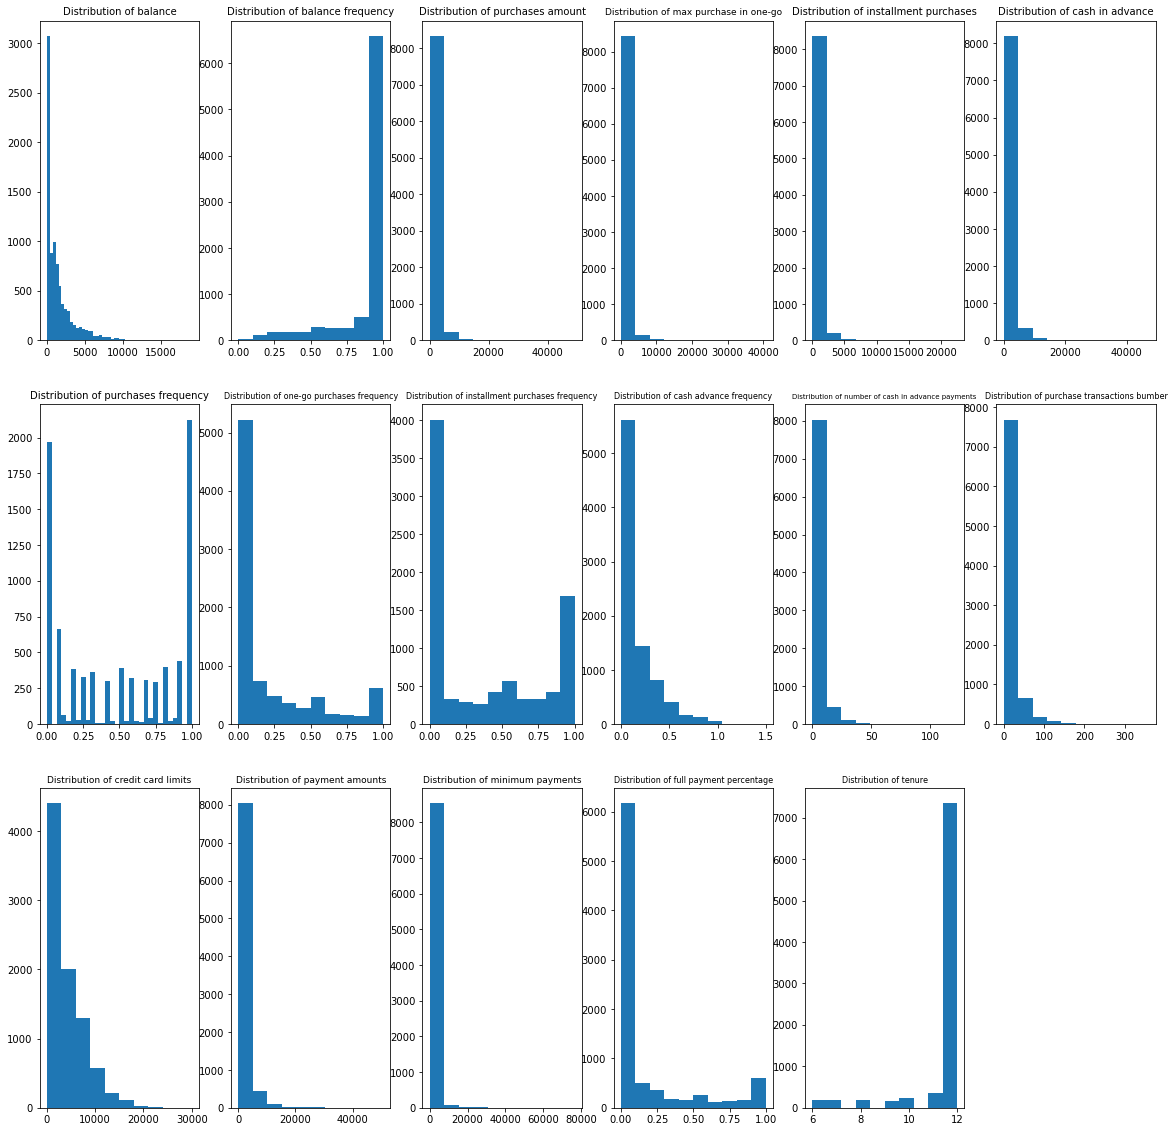

In [8]:
fig, axs = plt.subplots(3,6, figsize=(20,20))

axs[0][0].set_title('Distribution of balance', fontsize=10)
axs[0][0].hist(df.BALANCE, bins=50)

axs[0][1].set_title('Distribution of balance frequency', fontsize=10)
axs[0][1].hist(df.BALANCE_FREQUENCY, bins=10)

axs[0][2].set_title('Distribution of purchases amount', fontsize=10)
axs[0][2].hist(df.PURCHASES, bins=10)

axs[0][3].set_title('Distribution of max purchase in one-go', fontsize=9)
axs[0][3].hist(df.ONEOFF_PURCHASES, bins=10)

axs[0][4].set_title('Distribution of installment purchases', fontsize=10)
axs[0][4].hist(df.INSTALLMENTS_PURCHASES, bins=10)

axs[0][5].set_title('Distribution of cash in advance', fontsize=10)
axs[0][5].hist(df.CASH_ADVANCE, bins=10)

axs[1][0].set_title('Distribution of purchases frequency', fontsize=10)
axs[1][0].hist(df.PURCHASES_FREQUENCY, bins=30)

axs[1][1].set_title('Distribution of one-go purchases frequency', fontsize=8)
axs[1][1].hist(df.ONEOFF_PURCHASES_FREQUENCY, bins=10)

axs[1][2].set_title('Distribution of installment purchases frequency', fontsize=8)
axs[1][2].hist(df.PURCHASES_INSTALLMENTS_FREQUENCY, bins=10)

axs[1][3].set_title('Distribution of cash advance frequency', fontsize=8)
axs[1][3].hist(df.CASH_ADVANCE_FREQUENCY, bins=10)

axs[1][4].set_title('Distribution of number of cash in advance payments', fontsize=7)
axs[1][4].hist(df.CASH_ADVANCE_TRX, bins=10)

axs[1][5].set_title('Distribution of purchase transactions bumber', fontsize=8)
axs[1][5].hist(df.PURCHASES_TRX, bins=10)

axs[2][0].set_title('Distribution of credit card limits', fontsize=9)
axs[2][0].hist(df.CREDIT_LIMIT, bins=10)

axs[2][1].set_title('Distribution of payment amounts', fontsize=9)
axs[2][1].hist(df.PAYMENTS, bins=10)

axs[2][2].set_title('Distribution of minimum payments', fontsize=9)
axs[2][2].hist(df.MINIMUM_PAYMENTS, bins=10)

axs[2][3].set_title('Distribution of full payment percentage', fontsize=8)
axs[2][3].hist(df.PRC_FULL_PAYMENT, bins=10)

axs[2][4].set_title('Distribution of tenure', fontsize=8)
axs[2][4].hist(df.TENURE, bins=10)

fig.delaxes(axs[2][5]);

# 2. Preprocess features

All clustering algorithms requires some kind of feature standartization.
We will use standartization (or "z-scoring"):

$$X_{std} = \frac{X - mean(X)}{std(X)}$$

What is the mean of all columns in `X_std`? What is the standard deviation of all columns in `X_std`?


## Scientific notation

Recall that sometimes Python uses a so-called scientific notation for small numbers, e.g. notation `6.993531e-17` by definition is: 

$$6.993531 \cdot 10^{-17} = \frac{6.993531}{10^{17}} = 0.00000000000000006993531$$.

For more details, see https://sparrow.dev/python-scientific-notation/ .

For the purposes of this home assignment all numbers with absolute value smaller than $0.000001$ are effectively $0$.

In [9]:
X_standardized = (df - df.mean()) / df.std()

In [10]:
X_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516
C10002,0.764108,0.067675,-0.473181,-0.359139,-0.458812,2.568408,-1.236067,-0.686240,-0.926468,0.556990,0.099252,-0.597020,0.677165,0.796806,0.087684,0.212368,0.35516
C10003,0.426578,0.505375,-0.116406,0.099904,-0.458812,-0.468628,1.256004,2.646498,-0.926468,-0.681913,-0.479409,-0.120460,0.813805,-0.399480,-0.099900,-0.537696,0.35516
C10005,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.35516
C10006,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.35516


In [11]:
X_standardized.mean()

BALANCE                            -9.263857e-16
BALANCE_FREQUENCY                  -3.390996e-14
PURCHASES                          -3.894202e-15
ONEOFF_PURCHASES                    8.941872e-15
INSTALLMENTS_PURCHASES             -3.606425e-16
CASH_ADVANCE                        2.640829e-15
PURCHASES_FREQUENCY                -2.263963e-15
ONEOFF_PURCHASES_FREQUENCY         -1.084820e-14
PURCHASES_INSTALLMENTS_FREQUENCY    2.803712e-15
CASH_ADVANCE_FREQUENCY             -8.580252e-15
CASH_ADVANCE_TRX                    1.484364e-15
PURCHASES_TRX                      -1.010539e-15
CREDIT_LIMIT                        4.507871e-16
PAYMENTS                           -3.757223e-16
MINIMUM_PAYMENTS                    5.113955e-16
PRC_FULL_PAYMENT                   -4.139759e-15
TENURE                              1.712819e-14
dtype: float64

In [12]:
X_standardized.std()

BALANCE                             1.0
BALANCE_FREQUENCY                   1.0
PURCHASES                           1.0
ONEOFF_PURCHASES                    1.0
INSTALLMENTS_PURCHASES              1.0
CASH_ADVANCE                        1.0
PURCHASES_FREQUENCY                 1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY              1.0
CASH_ADVANCE_TRX                    1.0
PURCHASES_TRX                       1.0
CREDIT_LIMIT                        1.0
PAYMENTS                            1.0
MINIMUM_PAYMENTS                    1.0
PRC_FULL_PAYMENT                    1.0
TENURE                              1.0
dtype: float64

# 3. KMeans

What does K in KMeans means?


In K-means clustering, the "K" stands for the number of clusters that the algorithm will form. The K-means algorithm aims to partition data into K distinct, non-overlapping clusters. 

# Run KMeans with 5 clusters

In [17]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [14]:
kmeans = KMeans(n_clusters=5, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

In [15]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([3011, 1248, 3149,  250,  978], dtype=int64))

# 4. Run Kmeans with different number of clusters


Which number of clusters is optimal according to silhouette score?


In [16]:
def run_kmeans(x, kmin=2, kmax=20):
    inertia = []
    for k in tqdm(range(kmin, kmax+1)):
        kmeans = KMeans(n_clusters=k, n_init='auto')
        kmeans.fit(x)
        cluster_labels = kmeans.predict(x)
        results_df[f'clusters_kmeans_{k}'] = kmeans.predict(x)
        inertia.append(kmeans.inertia_)
    return inertia

In [17]:
results_df = pd.DataFrame()
kmin, kmax = 2, 20
n_clusters = range(kmin, kmax+1)

# standardized
inertia = run_kmeans(X_standardized, kmin, kmax)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 37.55it/s]


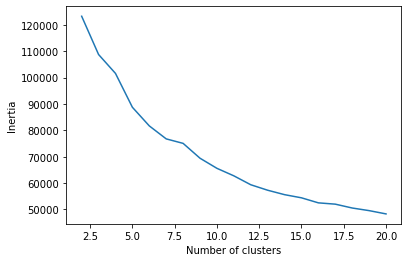

In [18]:
plt.plot(n_clusters, inertia);
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [19]:
from plot_utils import plot_silhouette
# if you run in google colab copy-paste code from `plot_utils.py` into a notebook cell

For n_clusters = 4 The average silhouette_score is : 0.19706334769456033
For n_clusters = 8 The average silhouette_score is : 0.18922663813914817
For n_clusters = 12 The average silhouette_score is : 0.21771895705090186
For n_clusters = 16 The average silhouette_score is : 0.19986413231372582
For n_clusters = 20 The average silhouette_score is : 0.20370681637166813


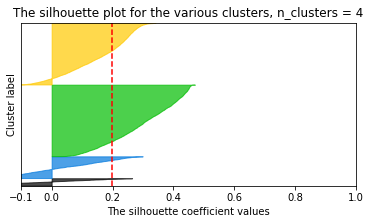

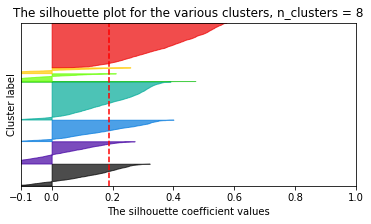

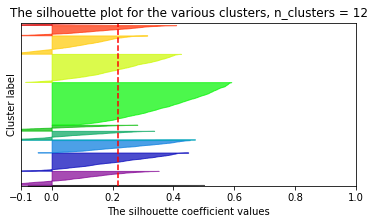

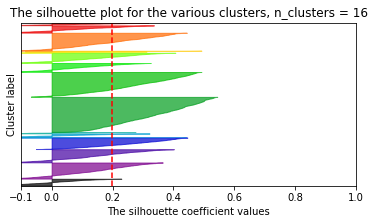

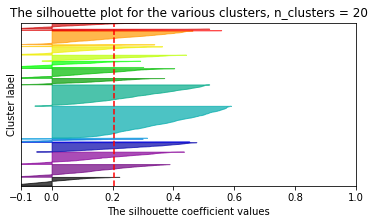

In [20]:
plot_silhouette(X_standardized, kmin=4, kmax=21, step=4)

# 5. Hierarchical clustering

What is hieararchical clustering?


Hierarchical clustering is a technique that groups similar data into clusters using a tree-like structure known as a dendrogram.

# 6. Run hierarchical clustering

with different types of linkage looking for 8-12 clusters (choose one number):
 - "single"
 - "complete"
 - $\textbf{"ward"}$
 - "average"
 
For each type of linkage print sizes of the resulting clusters. Which of the linkages result in a non-degenerative clustering?

**Degenerative** clustering is a clustering of data into N clusters with most of the data being in a small subset of clusters, and rest of the clusters containing 1-5-10 points each.


In [46]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
X_standardized.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516
C10002,0.764108,0.067675,-0.473181,-0.359139,-0.458812,2.568408,-1.236067,-0.686240,-0.926468,0.556990,0.099252,-0.597020,0.677165,0.796806,0.087684,0.212368,0.35516
C10003,0.426578,0.505375,-0.116406,0.099904,-0.458812,-0.468628,1.256004,2.646498,-0.926468,-0.681913,-0.479409,-0.120460,0.813805,-0.399480,-0.099900,-0.537696,0.35516


In [25]:
agc1 = AgglomerativeClustering(n_clusters=10, linkage='single')
df['agc1'] = agc1.fit_predict(X_standardized)
df.groupby('agc1').agg({"CUST_ID": 'count'})

,CUST_ID
agc1,
0,8627
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1


In [26]:
agc2 = AgglomerativeClustering(n_clusters=10, linkage='complete')
df['agc2'] = agc2.fit_predict(X_standardized)
df.groupby('agc2').agg({"CUST_ID": 'count'})

,CUST_ID
agc2,
0,20
1,8525
2,36
3,27
4,16
5,1
6,2
7,1
8,7


In [27]:
agc3 = AgglomerativeClustering(n_clusters=10, linkage="ward")
df['agc3'] = agc3.fit_predict(X_standardized)
df.groupby('agc3').agg({"CUST_ID": 'count'})

,CUST_ID
agc3,
0,1879
1,414
2,998
3,852
4,679
5,23
6,1040
7,2627
8,19


In [28]:
agc4 = AgglomerativeClustering(n_clusters=10, linkage="average")
df['agc4'] = agc4.fit_predict(X_standardized)
df.groupby('agc4').agg({"CUST_ID": 'count'})

,CUST_ID
agc4,
0,14
1,16
2,4
3,15
4,4
5,1
6,1
7,1
8,5


# 7. Plot dendrogram

for Ward linkage from the previous question what distance treshold will result in 10 clusters?


In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
# if you run in google colab copy paste code from `plot_utils.py` into a notebook cell

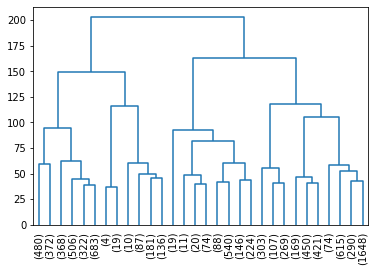

In [30]:
link = linkage(X_standardized, method='ward')
dendogram = dendrogram(link, truncate_mode='lastp', color_threshold=5, 
                       leaf_rotation=90., labels=X_standardized.index.tolist())

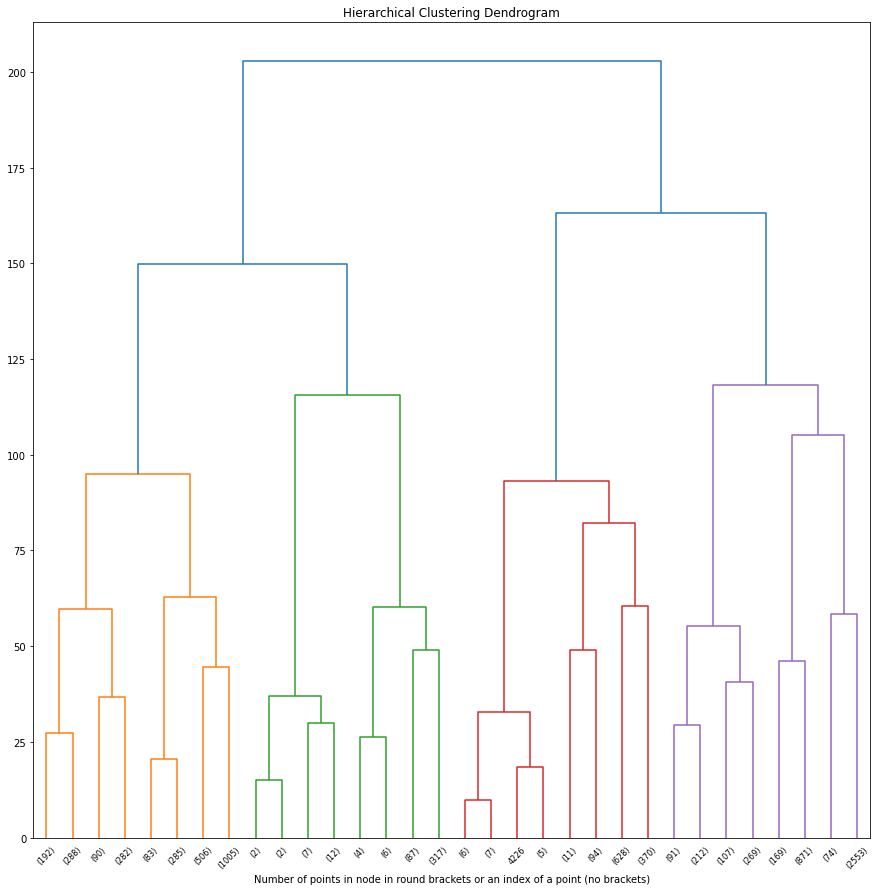

In [32]:
from plot_utils import plot_dendrogram
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X_standardized)

plt.figure(figsize=(15,15))
plt.title("Hierarchical Clustering Dendrogram") 
plot_dendrogram(model, truncate_mode="level", p=4)# plot the top three levels of the dendrogram
plt.xlabel("Number of points in node in round brackets or an index of a point (no brackets)")
plt.show()

# Visualization

To visualize our multi-dimensional data we will apply two differen dimensionality techniques: PCA and tSNE ("tea-sni")

# 8. Select all true statements about PCA


Conclusion from the ChatGPT:

- PCA is an unsupervised algorithm mainly used for dimensionality reduction in data.
- Explained variance refers to the proportion of the dataset's total variance that is accounted for by each component.
- PCA linearly combines the original features to construct new, principal components.

# Run PCA with 2 components

Unlike kmeans and hierarchical clustering PCA only requires data centering (without data scaling)

In [13]:
X_mean = df - df.mean(axis=0)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(2)
X_pca2 = pca.fit_transform(X_mean)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.47493166 0.17814415]
0.653075810711607


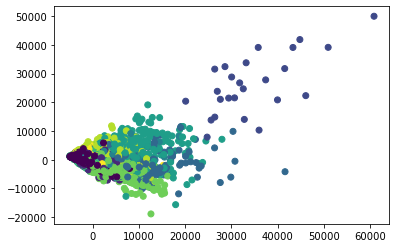

In [18]:
kmeans = KMeans(n_clusters=10, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels); # Use kmeans labels for the color

PCA visualizations are not always informative, we will try using TSNE, but first we need to select the optimal number of PCA components

# 9. Select number of PCA components

based on explained variance ratio. Which minimal number of PCA components explain **atleast 95%** of the data variance (`X_mean`)?


In [101]:
for i in range(0,13):
    pca = PCA(i)
    X_pca = pca.fit_transform(X_mean)
    print(f'For PCA{i}:', pca.explained_variance_ratio_.sum())

For PCA0: 0.0
For PCA1: 0.4749316580931145
For PCA2: 0.6530758102978895
For PCA3: 0.7932435124220756
For PCA4: 0.9079306100381823
For PCA5: 0.9551668711739137
For PCA6: 0.981761449590816
For PCA7: 0.999991916043173
For PCA8: 0.9999986310609771
For PCA9: 0.9999993633863686
For PCA10: 0.9999999551562299
For PCA11: 0.9999999912980119
For PCA12: 0.9999999953875746


Hence, the answer is 5.

# These are the `loadings` of the very first Principle component, which explains about 47% of data variance


In [102]:
components = dict(zip(df.columns, pca.components_[0]))
components = sorted(components.items(), key=lambda x: x[1], reverse=True)

for c, w in components:
    print(c, np.round(w, 3))

CREDIT_LIMIT 0.687
PAYMENTS 0.488
PURCHASES 0.295
BALANCE 0.291
CASH_ADVANCE 0.217
ONEOFF_PURCHASES 0.213
MINIMUM_PAYMENTS 0.136
INSTALLMENTS_PURCHASES 0.082
PURCHASES_TRX 0.002
CASH_ADVANCE_TRX 0.0
TENURE 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
agc1 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
BALANCE_FREQUENCY 0.0
PRC_FULL_PAYMENT 0.0


# 10. Select all correct statements

based on the whole PCA analysis


- The first principal component explains roughly 47.5% of the variance, which is the largest portion. This means that this component captures the most significant patterns and structures in the data.
- Features like 'CASH_ADVANCE_TRX', 'TENURE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE_FREQUENCY', and 'PRC_FULL_PAYMENT' have a zero weight in the first component, meaning they do not influence this component.
- Examining the weights (also known as 'loadings') of the variables on this first principal component, it's apparent that 'CREDIT_LIMIT', 'PAYMENTS', and 'PURCHASES' are the features most strongly associated with this component. They have the highest weights: 0.687, 0.488, and 0.295 respectively. These high weights suggest that the first principal component might represent a sort of 'financial activity' dimension - with 'CREDIT_LIMIT' perhaps relating to the customer's creditworthiness, 'PAYMENTS' reflecting the customer's payment behavior, and 'PURCHASES' indicating the customer's purchasing behavior.

# TSNE visualization

# 11. What is t-SNE?


In [103]:
pip install opentsne

Note: you may need to restart the kernel to use updated packages.


In [19]:
from openTSNE import TSNE

pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean)
embedding = TSNE().fit(X_pca10)

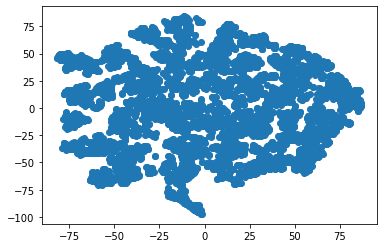

In [20]:
plt.scatter(embedding[:, 0], embedding[:, 1]);

In [47]:
ac = AgglomerativeClustering(n_clusters=8, linkage='ward')
prediction = ac.fit_predict(X_pca10)
np.unique(prediction, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64),
 array([  93, 2336,  795,  165, 4504,   23,  673,   47], dtype=int64))

### tSNE with AgglomerativeClustering labels

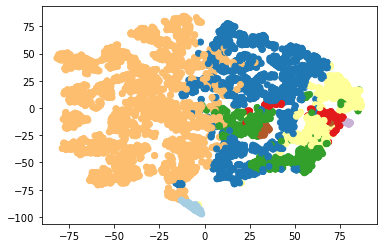

In [48]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=prediction, cmap='Paired');

### tSNE with KMeans clustering labels

In [49]:
kmeans = KMeans(n_clusters=8, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

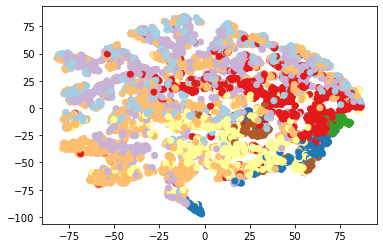

In [50]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired');

# 12. Which metrics are suitable for clusterings comparison?



By using ChatGPT:
- normalized mutual information;
- adjusted rand index

# 13. Compare Kmeans and Agglomerative clusterings

with 8 clusters using Adjusted Rand Score, what is the value of ARI?


In [55]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

In [56]:
kmeans = KMeans(n_clusters=8, n_init='auto')
labels = kmeans.fit_predict(X_standardized)

In [57]:
agc = AgglomerativeClustering(n_clusters=8, linkage='ward')
labels_agc = agc.fit_predict(X_standardized)

In [58]:
print('ARI equals to:', adjusted_rand_score(labels, labels_agc))
print('AMI equals to:', adjusted_mutual_info_score(labels, labels_agc))

ARI equals to: 0.6186482554356777
AMI equals to: 0.6143680735617986


Visually KMeans and Agglomerative (with Ward distance) result in drastically different results, we will try to remove data outliers and see if it will affect the results

# Remove outliers

In [60]:
def detect_outliers_very_simple(x, col):
    """A naive outliers detector, based on left most (5 percentile) or right most (95 percentile) threshold"""
    if col in ['BALANCE_FREQUENCY', 'TENURE']:
        return x < x.quantile(0.05)
    else:
        return x > x.quantile(0.95)

In [61]:
cols_outliers = dict()
outliers = [False] * df.shape[0]

for col in df.columns:
    cols_outliers[col] = detect_outliers_very_simple(df[col], col)
    outliers += cols_outliers[col]
    print(col, np.round(cols_outliers[col].sum() / df.shape[0] * 100), '%')

BALANCE 5.0 %
BALANCE_FREQUENCY 4.0 %
PURCHASES 5.0 %
ONEOFF_PURCHASES 5.0 %
INSTALLMENTS_PURCHASES 5.0 %
CASH_ADVANCE 5.0 %
PURCHASES_FREQUENCY 0.0 %
ONEOFF_PURCHASES_FREQUENCY 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY 0.0 %
CASH_ADVANCE_FREQUENCY 4.0 %
CASH_ADVANCE_TRX 5.0 %
PURCHASES_TRX 5.0 %
CREDIT_LIMIT 4.0 %
PAYMENTS 5.0 %
MINIMUM_PAYMENTS 5.0 %
PRC_FULL_PAYMENT 0.0 %
TENURE 4.0 %


In [62]:
X_mean['is_outlier'] = outliers

# 14. What is the percentage of detected outliers (to the whole data)?


In [63]:
print(f'The percentage of detected outliers equals to {X_mean.is_outlier.value_counts()[1] / len(X_mean.is_outlier) * 100:.0f}%')

The percentage of detected outliers equals to 32%


# 15. Repeat the analysis on filtered data

Run:
1. PCA with 10 components
2. KMeans with **12 clusters** (using PCA representation), set `n_init='auto'`
3. Hierarchical clustering with **12 clusters** (using PCA representation)
4. Compare 2 and 3 using adjusted mutual information

what is the value of AMI?


In [64]:
X_mean_filtered = X_mean.query('is_outlier==False')

In [65]:
from sklearn.metrics import adjusted_mutual_info_score

In [66]:
# pca with 10 components
pca = PCA(10)
X_pca10 = pca.fit_transform(X_mean_filtered)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[6.33254685e-01 1.58176700e-01 9.48038635e-02 6.29137912e-02
 3.05057993e-02 1.42346397e-02 6.10244776e-03 5.09343173e-06
 2.48990802e-06 4.13975168e-07]
0.999999923764002


In [67]:
# kmeans with 12 clusters(using pca representation)
kmeans_12 = KMeans(n_clusters=12, n_init='auto')
labels_12 = kmeans.fit_predict(X_pca10)

In [68]:
#  hierarchical clustering with 12 clusters (using pca representation)
ac_12 = AgglomerativeClustering(n_clusters=12, linkage='ward')
prediction_12 = ac_12.fit_predict(X_pca10)

In [69]:
# comparing 2 and 3 using AMI
print('AMI equals to:', adjusted_mutual_info_score(labels_12, prediction_12))

AMI equals to: 0.6111840338199235


# 16. Plot a subplot with points colored according to kmeans and agglomerative clustering

Draw a 1 row 2 columns subplot using TSNE embeddings. Title each subplot according to the source of clusters' colors (kmeans or agglomerative). Save pdf and upload it to the submission form.

In [155]:
embedding = TSNE().fit(X_pca10)

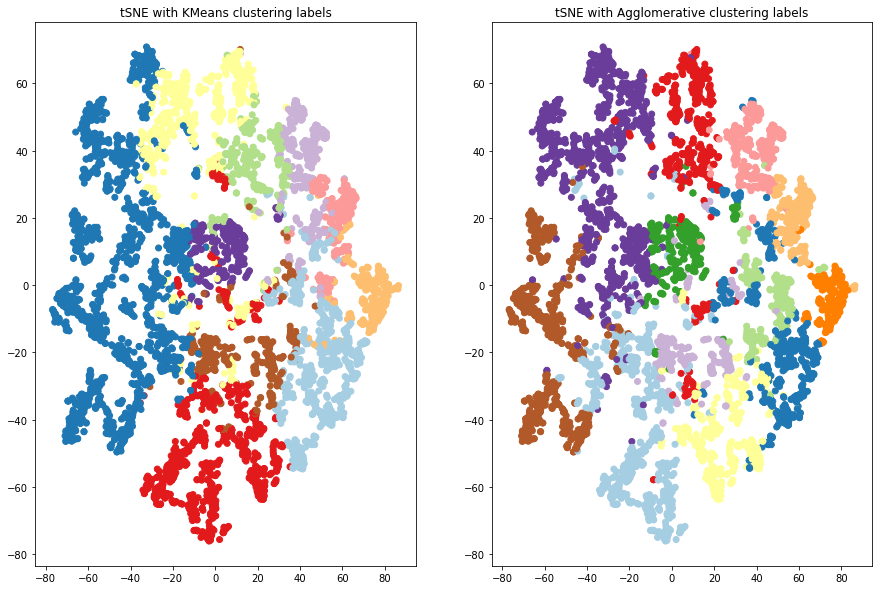

In [168]:
fig, axs = plt.subplots(1,2, figsize=(15,10))

axs[0].set_title('tSNE with KMeans clustering labels')
axs[0].scatter(embedding[:, 0], embedding[:, 1], c=labels_12, cmap='Paired')

axs[1].set_title('tSNE with Agglomerative clustering labels')
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=prediction_12, cmap='Paired');

# Plotly visualization

> ChatGPT: `How to plot an interactive scatter plot in python so I can mouse over a point to see some label, provide a code example.`

> `What if my data source is stored in pandas DataFrame?`

> `How to add a color to each point?`

finalize with some manual edits (change title, add color alpha, etc.)

## Try to mouse over the points on the graph

In [170]:
x_plot = pd.DataFrame(index=X_mean_filtered.index)
x_plot['tsne1'] = embedding[:, 0]
x_plot['tsne2'] = embedding[:, 1]
x_plot['customer_id'] = range(embedding.shape[0])
x_plot['cluster_agg'] = prediction_12
x_plot['cluster_kmeans'] = labels_12
x_plot = x_plot.reset_index()

In [173]:
x_plot.head()

,CUST_ID,tsne1,tsne2,customer_id,cluster_agg,cluster_kmeans
0,C10001,-71.052064,-3.330111,0,11,1
1,C10003,54.346746,13.332412,1,6,0
2,C10005,-58.958167,38.115855,2,9,1
3,C10006,-32.427108,38.218588,3,9,8
4,C10008,-2.866063,61.153337,4,5,8


In [ ]:
# !pip install plotly

In [171]:
import plotly.express as px

In [179]:
fig = px.scatter(x_plot, x='tsne1', y='tsne2', color='cluster_agg', hover_data=['CUST_ID'], )

# Customize aspect
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers')) 
fig.update_layout(title='TSNE plot of customers clusters(Agglomerative clustering)', xaxis_title='x', yaxis_title='y')
fig.update_yaxes(scaleanchor = "x", scaleratio = 1)

fig.show()


# 17. Interpret the resulting clusters

Try to interpret the resulting clusters, you can use smaller number of clusters (e.g. 4-8) and any clustering algorithm you want. Provide a short but detailed report <300 words. Save it to pdf and upload to submission form.

Let's choose results from Agglomerative Clustering with the results below for the interpretation: we will set n_clusters=4 and linkage="ward".

In [199]:
agc_result = AgglomerativeClustering(n_clusters=4, linkage="ward")
df['agc_result'] = agc_result.fit_predict(X_standardized)

# Credit Card dataset

- CUST_ID - Identification of Credit Card holder (Categorical)
- BALANCE - Balance amount left in their account to make purchases
- BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES - Amount of purchases made from account
- ONEOFF_PURCHASES - Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES - Amount of purchase done in installment
- CASH_ADVANCE - Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid
- CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX - Numbe of purchase transactions made
- CREDIT_LIMIT - Limit of Credit Card for user
- PAYMENTS - Amount of Payment done by user
- MINIMUM_PAYMENTS - Minimum amount of payments made by user
- PRC_FULL_PAYMENT - Percent of full payment paid by user
- TENURE - Tenure of credit card service for user

In [205]:
df.groupby('agc_result').agg({"CUST_ID": 'count',
                       "BALANCE": 'mean',
                       "PAYMENTS": 'mean',
                       "CREDIT_LIMIT": 'mean',
                       "BALANCE_FREQUENCY": 'mean',
                       "PURCHASES": 'mean',
                       "PURCHASES_TRX": 'sum'})

,CUST_ID,BALANCE,PAYMENTS,CREDIT_LIMIT,BALANCE_FREQUENCY,PURCHASES,PURCHASES_TRX
agc_result,,,,,,,
0,4346,979.609234,946.141268,3234.823232,0.813965,338.900152,19397
1,437,3879.514557,6344.149755,9467.048055,0.988517,6908.217849,37105
2,1122,4695.246244,3759.561600,7805.748663,0.976833,516.485713,8556
3,2731,954.735370,1577.517889,4430.276955,0.975482,1385.719044,64769


The set algorithm gives us the distribution over 4 clusters. Almost all of them update their balances with equal frequency. Among these clusters, we can highlight the one with the most purchases transactions in total - 3, also this cluster shows the second place of average "purchases" value with the least average balance per customer. Therefore, possibly these are the people who make small purchases but frequently. On the other hand, cluster 1, with the least number of people within, demonstrates extremely high average level of "purchases" with the highest average credit limit and "payments" as well. We can conclude, this is the cluster of affluent customers. Perhaps, cluster 2 also represents people with "above average" income, since its average "balance" is the highest with the second value of credit limit. Judging by total purchases transactions(the least among all) and mean "purchases", these are the people who update their balance in order to replenish it. Cluster 0, keeping the majority of customers, represents large number of transactions with the least average amount of payments, credit limit, amount of purchases, etc. These are the signs that cluster 0 includes the poorest customers. Hence, basically we have found clusters for poor customers(0; 50.3%), middle class(3; 31.6%) and wealthy customers(1,2; 18.1%). 